In [19]:
pip install pandas numpy seaborn matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the training and test datasets
train_data = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')  # Replace with the path to your train.csv
test_data = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')    # Replace with the path to your test.csv

# Print the column names to identify the target column
print("Training Data Columns:")
print(train_data.columns.tolist())

print("Test Data Columns:")
print(test_data.columns.tolist())  # Check column names

# After identifying the correct target column name
target_column = 'loan_status'  # Update with the actual target column name
id_column = 'id'  # Update with the actual ID column name from test_data

Training Data Columns:
['id', 'person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length', 'loan_status']
Test Data Columns:
['id', 'person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']


In [21]:
# Ensure the target column exists
if target_column not in train_data.columns:
    raise ValueError(f"Target column '{target_column}' does not exist in the training data.")

# Checking for missing values
print("Missing values in train data:")
print(train_data.isnull().sum())
print("Missing values in test data:")
print(test_data.isnull().sum())

# Fill missing values
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)


Missing values in train data:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
Missing values in test data:
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


/tmp/ipykernel_30/1257065982.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_30/1257065982.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


<Figure size 1000x600 with 0 Axes>

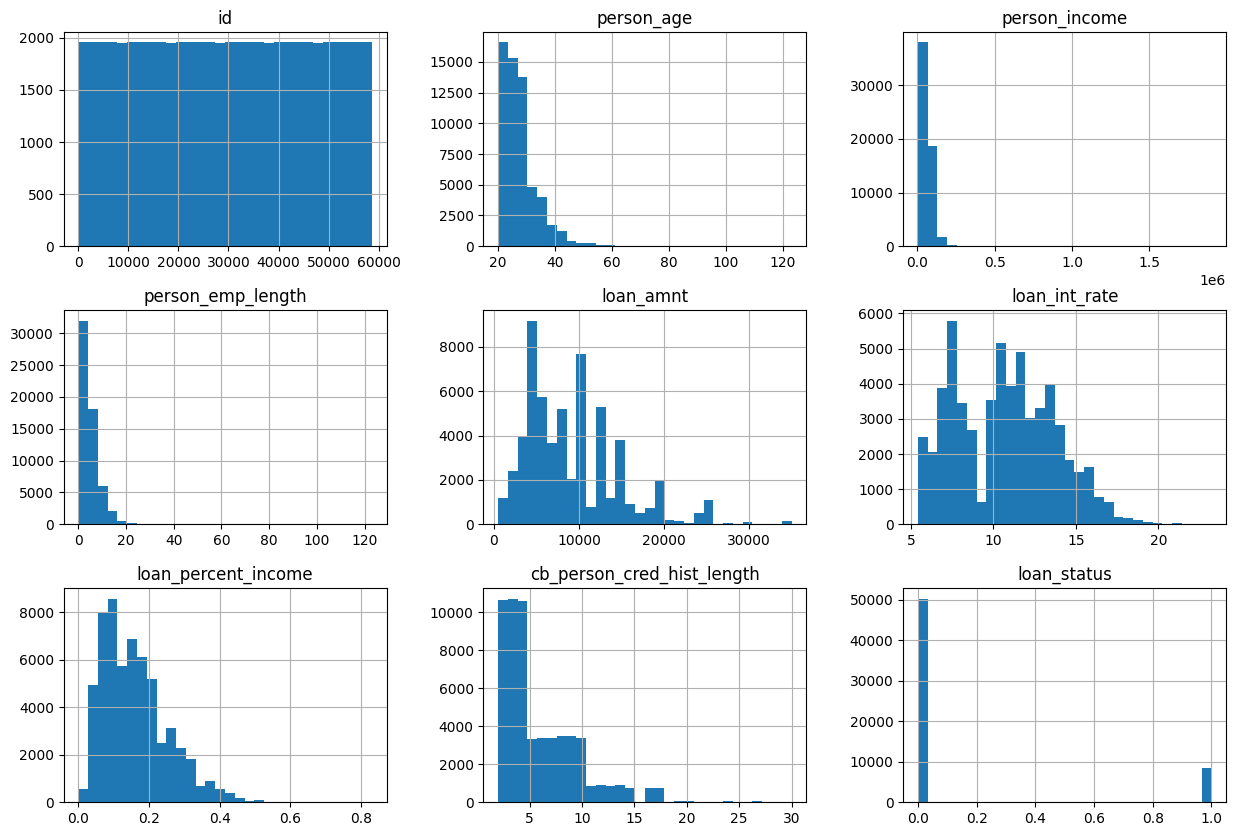

In [22]:
# Visualizing distributions of numeric features in training data
plt.figure(figsize=(10, 6))
train_data.hist(bins=30, figsize=(15, 10))
plt.show()

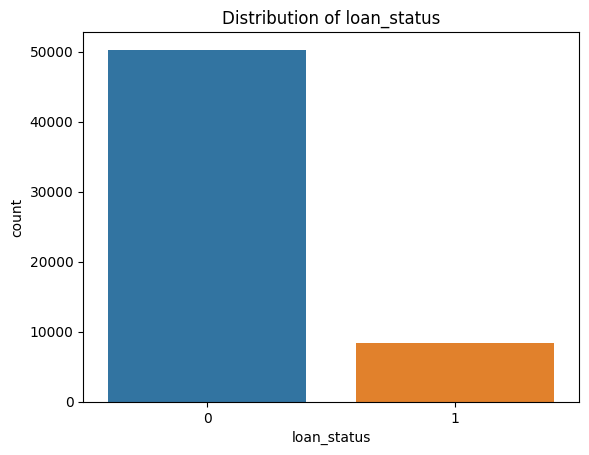

In [23]:
# Visualizing the distribution of the target variable
sns.countplot(x=target_column, data=train_data)
plt.title(f'Distribution of {target_column}')
plt.show()

In [24]:
# Encoding categorical features (for both train and test datasets)
label_encoders = {}
for column in train_data.select_dtypes(include=['object']).columns:
    if column != target_column:
        le = LabelEncoder()
        train_data[column] = le.fit_transform(train_data[column])
        test_data[column] = le.transform(test_data[column])
        label_encoders[column] = le

In [25]:
# Splitting the train data into features (X_train) and target (y_train)
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

# Predictions on the test data
X_test = test_data

# Train-test split (optional, for validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

# Predictions on validation data
y_val_pred = model.predict(X_val_split)

In [26]:
# Evaluating the model on validation set
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Predictions on the test data
test_predictions = model.predict(X_test)

Validation Accuracy: 0.95


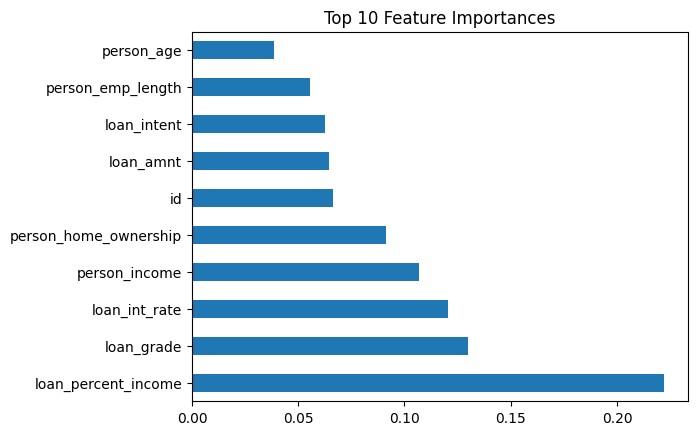

In [27]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

# Create the submission DataFrame
submission = pd.DataFrame({
    id_column: test_data[id_column],  # Use the correct ID column name
    target_column: test_predictions
})

In [28]:
# Saving the predictions to a CSV file for submission
submission.to_csv('loan_approval_predictions.csv', index=False)
print("Predictions saved to loan_approval_predictions.csv")

Predictions saved to loan_approval_predictions.csv
